# Obtained_data:

In [1]:
import numpy as np 

In [ ]:
import pandas as pd
user_data=pd.read_csv("Final_User_Dataset.csv")
item_data=pd.read_csv("Final_Anime_Dataset.csv")
user_input=pd.read_csv("User_input.csv")



In [ ]:
user_data[user_data.columns[21]].dtype

dtype('float64')

In [ ]:
user_data.iloc[21, :].unique()

array([347, 'troublesome4u', 'Male', 8.64, 167.0, 8.84, 8.83, 7.93, 9.56,
       7.06, 8.1, 8.67, 8.0, 6.8, 8.47, 7.17, 7.53, 6.47, 8.54, 6.83,
       8.57, 8.32, 7.87, 9.0, 8.69, 10.0, 47, 'Gen_X', 0, 1], dtype=object)

In [ ]:
# user_data["avg_Romance"] = pd.to_numeric(user_data["avg_Romance"], errors="coerce")


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class GenreRatingTypeConverter(BaseEstimator, TransformerMixin):
    """
    A transformer that converts all columns with a specific prefix to numeric data types,
    handling non-numeric values by converting them to NaN.
    
    Parameters:
    -----------
    column_prefix : str, default='avg_'
        Prefix used to identify columns for conversion
    errors : str, default='coerce'
        How to handle errors in conversion:
        - 'ignore': leave invalid values as is
        - 'raise': raise an exception
        - 'coerce': convert invalid values to NaN
    downcast : str or None, default=None
        Type to downcast to if possible ('integer', 'signed', 'unsigned', 'float')
    """
    
    def __init__(self, column_prefix='avg_', errors='coerce', downcast=None):
        self.column_prefix = column_prefix
        self.errors = errors
        self.downcast = downcast
        self.columns_converted_ = None
    
    def fit(self, X, y=None):
        """
        Identify columns to convert based on prefix.
        
        Parameters:
        -----------
        X : pandas.DataFrame
            Input DataFrame
        y : array-like, default=None
            Not used, present for API consistency
            
        Returns:
        --------
        self
        """
        # Identify columns starting with the specified prefix
        self.columns_converted_ = [col for col in X.columns if col.startswith(self.column_prefix)]
        return self
    
    def transform(self, X):
        """
        Convert identified columns to numeric types.
        
        Parameters:
        -----------
        X : pandas.DataFrame
            Input DataFrame to transform
            
        Returns:
        --------
        pandas.DataFrame
            Transformed DataFrame with numeric columns
        """
        X_result = X.copy()
        
        for column in self.columns_converted_:
            X_result[column] = pd.to_numeric(X_result[column], 
                                             errors=self.errors, 
                                             downcast=self.downcast)
        
        return X_result
    
    def get_feature_names_out(self, input_features=None):
        """
        Get output feature names.
        
        Parameters:
        -----------
        input_features : array-like of str or None, default=None
            Input features
            
        Returns:
        --------
        list
            List of converted column names
        """
        return self.columns_converted_

In [ ]:
# Initialize the transformer
genre_converter = GenreRatingTypeConverter(column_prefix='avg_', errors='coerce')

# Apply the transformation
user_data = genre_converter.fit_transform(user_data)

# Check the data types of converted columns
for col in genre_converter.columns_converted_:
    print(f"{col}: {user_data[col].dtype}")

avg_Action: float64
avg_Adventure: float64
avg_Avant Garde: float64
avg_Award Winning: float64
avg_Boys Love: float64
avg_Comedy: float64
avg_Drama: float64
avg_Ecchi: float64
avg_Erotica: float64
avg_Fantasy: float64
avg_Girls Love: float64
avg_Gourmet: float64
avg_Hentai: float64
avg_Horror: float64
avg_Mystery: float64
avg_Romance: float64
avg_Sci-Fi: float64
avg_Slice of Life: float64
avg_Sports: float64
avg_Supernatural: float64
avg_Suspense: float64


In [ ]:
user_data["avg_Romance"].dtype

dtype('float64')

In [ ]:
min_value = user_data['avg_Mystery'].min()
max_value = user_data['avg_Mystery'].max()
print(f"Range of avg_Mystery: {min_value} to {max_value}")

Range of avg_Mystery: 1.0 to 10.0


In [ ]:
user_data["avg_Mystery"].dtype

dtype('float64')

In [ ]:
item_data.shape

(19848, 1579)

In [ ]:
user_data.columns

Index(['user_id', 'Username', 'Gender', 'Mean Score', 'Completed',
       'avg_Action', 'avg_Adventure', 'avg_Avant Garde', 'avg_Award Winning',
       'avg_Boys Love', 'avg_Comedy', 'avg_Drama', 'avg_Ecchi', 'avg_Erotica',
       'avg_Fantasy', 'avg_Girls Love', 'avg_Gourmet', 'avg_Hentai',
       'avg_Horror', 'avg_Mystery', 'avg_Romance', 'avg_Sci-Fi',
       'avg_Slice of Life', 'avg_Sports', 'avg_Supernatural', 'avg_Suspense',
       'Age', 'Viewer_Category', 'Age_Group__Gen_Alpha', 'Age_Group__Zoomers',
       'Age_Group__Millennials', 'Age_Group__Gen_X',
       'Age_Group__Boomers_Plus'],
      dtype='object')

In [ ]:
item_data.columns
item_data.sample()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,"Studio_pH Studio, D & D Pictures","Studio_pH Studio, Noovo",Studio_production doA,Studio_studio MOTHER,Studio_studio YOG,Studio_trenova,Studio_ufotable,"Studio_ufotable, Shaft, A-1 Pictures, SILVER LINK., Lerche, Lay-duce, CloverWorks, Drive","Studio_ufotable, feel., Studio Flag",Release_Year
11102,34543,Dive!!,DIVE!!,DIVE!!,6.08,"Comedy, Sports",The series revolves around the Mizuki Diving C...,TV,12,"Jul 7, 2017 to Sep 22, 2017",...,0,0,0,0,0,0,0,0,0,2017.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop=None, dtype=int)

# Fit and transform the 'Gender' column
gender_encoded = encoder.fit_transform(user_data[['Gender']])

# Get the column names for the encoded features
gender_columns = encoder.get_feature_names_out(['Gender'])

# Create a DataFrame for the encoded features
gender_encoded_df = pd.DataFrame(gender_encoded, columns=gender_columns)

# Concatenate the one-hot encoded columns with the original DataFrame
user_data = pd.concat([user_data, gender_encoded_df], axis=1)

# Drop the original 'Gender' column if no longer needed
user_data.drop(columns=['Gender'], inplace=True)

# Display the updated DataFrame
print(user_data.head())

   user_id  Username  Mean Score  Completed  avg_Action  avg_Adventure  \
0        1     Xinil        7.37      233.0        7.68           7.90   
1       20    vondur        8.06       94.0        8.02           8.24   
2       66    Hiromi        7.53      148.0        7.49           7.31   
3       82    Achtor        7.17      153.0        7.36           7.71   
4      112  luffykun        8.77      125.0        8.60           8.36   

   avg_Avant Garde  avg_Award Winning  avg_Boys Love  avg_Comedy  ...  Age  \
0             8.00               8.18           7.06        7.02  ...   40   
1             9.00               8.43           7.06        7.77  ...   37   
2             7.00               7.90           7.06        7.46  ...   35   
3             8.80               8.25           7.06        7.05  ...   36   
4             7.93               9.80           7.06        8.67  ...   42   

   Viewer_Category  Age_Group__Gen_Alpha  Age_Group__Zoomers  \
0            Gen_X    

In [ ]:
item_data["Rating"].values

array(['R - 17+ (violence & profanity)', 'R - 17+ (violence & profanity)',
       'PG-13 - Teens 13 or older', ..., 'PG-13 - Teens 13 or older',
       'PG-13 - Teens 13 or older', 'PG-13 - Teens 13 or older'],
      dtype=object)

In [ ]:
user_data.shape

(71278, 35)

In [ ]:
user_data.columns

Index(['user_id', 'Username', 'Mean Score', 'Completed', 'avg_Action',
       'avg_Adventure', 'avg_Avant Garde', 'avg_Award Winning',
       'avg_Boys Love', 'avg_Comedy', 'avg_Drama', 'avg_Ecchi', 'avg_Erotica',
       'avg_Fantasy', 'avg_Girls Love', 'avg_Gourmet', 'avg_Hentai',
       'avg_Horror', 'avg_Mystery', 'avg_Romance', 'avg_Sci-Fi',
       'avg_Slice of Life', 'avg_Sports', 'avg_Supernatural', 'avg_Suspense',
       'Age', 'Viewer_Category', 'Age_Group__Gen_Alpha', 'Age_Group__Zoomers',
       'Age_Group__Millennials', 'Age_Group__Gen_X', 'Age_Group__Boomers_Plus',
       'Gender_Female', 'Gender_Male', 'Gender_Non-Binary'],
      dtype='object')

In [ ]:
item_data.columns


Index(['anime_id', 'Name', 'English name', 'Other name', 'Score', 'Genres',
       'Synopsis', 'Type', 'Episodes', 'Aired',
       ...
       'Studio_pH Studio, D & D Pictures', 'Studio_pH Studio, Noovo',
       'Studio_production doA', 'Studio_studio MOTHER', 'Studio_studio YOG',
       'Studio_trenova', 'Studio_ufotable',
       'Studio_ufotable, Shaft, A-1 Pictures, SILVER LINK., Lerche, Lay-duce, CloverWorks, Drive',
       'Studio_ufotable, feel., Studio Flag', 'Release_Year'],
      dtype='object', length=1579)

In [ ]:

item_data.isna().sum()

anime_id                                                                                       0
Name                                                                                           0
English name                                                                                   0
Other name                                                                                     0
Score                                                                                       5183
                                                                                            ... 
Studio_trenova                                                                                 0
Studio_ufotable                                                                                0
Studio_ufotable, Shaft, A-1 Pictures, SILVER LINK., Lerche, Lay-duce, CloverWorks, Drive       0
Studio_ufotable, feel., Studio Flag                                                            0
Release_Year                  

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class ColumnDropper(BaseEstimator, TransformerMixin):
    """
    A transformer that drops specified columns from a DataFrame.
    
    Parameters:
    -----------
    columns_to_drop : list of str
        List of column names to drop by default.
    """
    def __init__(self, columns_to_drop=None):
        self.columns_to_drop = columns_to_drop if columns_to_drop else []

    def fit(self, X, y=None):
        # No fitting required for this transformer
        return self

    def transform(self, X):
        """
        Drops the specified columns from the DataFrame.
        
        Parameters:
        -----------
        X : pandas.DataFrame
            Input DataFrame
            
        Returns:
        --------
        pandas.DataFrame
            Transformed DataFrame with specified columns dropped
        """
        X_transformed = X.drop(columns=self.columns_to_drop, errors='ignore')
        return X_transformed

# Define the default columns to drop
default_columns_to_drop = [
    "Genres", "Episodes", "Rating_UNKNOWN", "Producers", "Aired",
    "Premiered", "Status", "Studios", "Licensors", "Duration"
]

# Create the pipeline
pipeline = Pipeline([
    ('column_dropper', ColumnDropper(columns_to_drop=default_columns_to_drop))
])

# Apply the pipeline to the item_data DataFrame
filtered_item_data_df = pipeline.fit_transform(item_data)

# Display the resulting DataFrame
print(filtered_item_data_df.head())

   anime_id                             Name             English name  \
0         1                     Cowboy Bebop             Cowboy Bebop   
1         5  Cowboy Bebop: Tengoku no Tobira  Cowboy Bebop: The Movie   
2         6                           Trigun                   Trigun   
3         7               Witch Hunter Robin       Witch Hunter Robin   
4         8                   Bouken Ou Beet   Beet the Vandel Buster   

                         Other name  Score  \
0                         カウボーイビバップ   8.75   
1                    カウボーイビバップ 天国の扉   8.38   
2                             トライガン   8.22   
3  Witch Hunter ROBIN (ウイッチハンターロビン)   7.25   
4                            冒険王ビィト   6.94   

                                            Synopsis   Type    Source  \
0  Crime is timeless. By the year 2071, humanity ...     TV  Original   
1  Another day, another bounty—such is the life o...  Movie  Original   
2  Vash the Stampede is the man with a $$60,000,0...     TV     M

In [ ]:
filtered_item_data_df.columns

Index(['anime_id', 'Name', 'English name', 'Other name', 'Score', 'Synopsis',
       'Type', 'Source', 'Rating', 'Rank',
       ...
       'Studio_pH Studio, D & D Pictures', 'Studio_pH Studio, Noovo',
       'Studio_production doA', 'Studio_studio MOTHER', 'Studio_studio YOG',
       'Studio_trenova', 'Studio_ufotable',
       'Studio_ufotable, Shaft, A-1 Pictures, SILVER LINK., Lerche, Lay-duce, CloverWorks, Drive',
       'Studio_ufotable, feel., Studio Flag', 'Release_Year'],
      dtype='object', length=1569)

In [ ]:
filtered_item_data_df.shape
filtered_item_data_df.sample(5)

,anime_id,Name,English name,Other name,Score,Synopsis,Type,Source,Rating,Rank,...,"Studio_pH Studio, D & D Pictures","Studio_pH Studio, Noovo",Studio_production doA,Studio_studio MOTHER,Studio_studio YOG,Studio_trenova,Studio_ufotable,"Studio_ufotable, Shaft, A-1 Pictures, SILVER LINK., Lerche, Lay-duce, CloverWorks, Drive","Studio_ufotable, feel., Studio Flag",Release_Year
19502,55120,Gon de Hanta 2nd Season Special,UNKNOWN,Gon的旱獭 第二季 SP,NaN,A special episode of Gon de Hanta to commemora...,ONA,Original,G - All Ages,16125,...,0,0,0,0,0,0,0,0,0,2018.0
7994,21953,Sore Ike! Anpanman: Horrorman to Hora Horako,UNKNOWN,それいけ!アンパンマン ホラーマンとホラ・ホラコ,NaN,No description available for this anime.,Movie,Unknown,PG - Children,19986,...,0,0,0,0,0,0,0,0,0,2007.0
8943,28313,Kanojo wa Dare to demo Sex Suru.,UNKNOWN,彼女は誰とでもセックスする.,6.64,Kazuhiro Sayama finally gathers the courage to...,OVA,Visual novel,Rx - Hentai,0,...,0,0,0,0,0,0,0,0,0,2015.0
17596,50518,Komaneko Short Movie 2021,Komaneko's Season's Greetings 2021,こまねこショートムービー2021,NaN,Komaneko's Season's Greetings from dwarf studi...,Special,Unknown,G - All Ages,17398,...,0,0,0,0,0,0,0,0,0,2020.0
18298,52221,Xian Wu Cangqiong,Martial God Stream,仙武苍穹,6.04,There are many dynasties in Yongxian Continent...,ONA,Original,PG-13 - Teens 13 or older,8660,...,0,0,0,0,0,0,0,0,0,2022.0


In [ ]:
filtered_item_data_df["Score"].isna().sum()

5183

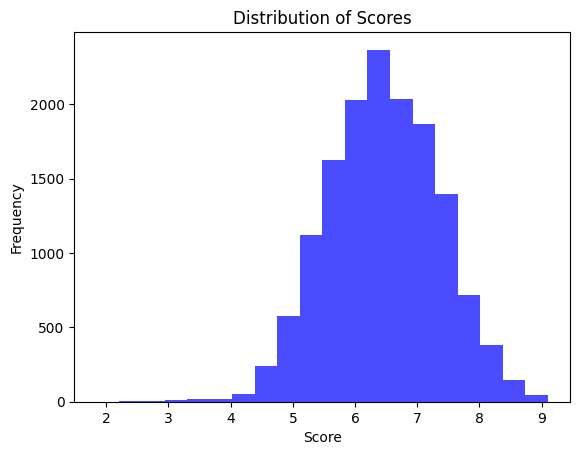

In [ ]:
import matplotlib.pyplot as plt

plt.hist(filtered_item_data_df['Score'].dropna(), bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# from sklearn.impute import SimpleImputer
# import pandas as pd

# # Replace 'UNKNOWN' with NaN for consistent handling of missing values
# filtered_item_data_df['Score'] = filtered_item_data_df['Score'].replace('UNKNOWN', pd.NA)

# # Initialize SimpleImputer with mean or median strategy
# imputer = SimpleImputer(strategy='mean')  # Change to 'median' if distribution is skewed

# # Apply imputation on the Score column
# filtered_item_data_df['Score'] = imputer.fit_transform(filtered_item_data_df[['Score']])

# # Verify that there are no missing values left in Score
# print(filtered_item_data_df['Score'].isna().sum())  # Should print 0


0


In [ ]:
# # Keep rows where both 'Score' and 'Release_Year' are not null
# filtered_item_data_df = filtered_item_data_df[filtered_item_data_df["Score"].notna() & filtered_item_data_df["Release_Year"].notna()]

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

class AnimeDataCleaner(BaseEstimator, TransformerMixin):
    """
    A transformer that handles missing values in anime datasets by:
    1. Converting 'UNKNOWN' string values to NaN
    2. Imputing missing values using a specified strategy
    3. Optionally filtering out rows with missing values in specified columns
    
    Parameters:
    -----------
    unknown_placeholders : list or str, default=['UNKNOWN']
        String values to be treated as missing
    columns_to_clean : list or None, default=None
        Columns to clean (if None, all columns will be processed)
    imputer_strategy : str, default='mean'
        Strategy for SimpleImputer ('mean', 'median', 'most_frequent', 'constant')
    imputer_fill_value : any, default=None
        Value to fill if strategy is 'constant'
    require_columns : list or None, default=None
        Columns that must have non-null values after imputation
    verbose : bool, default=False
        Whether to print information about the transformation
    """
    
    def __init__(self, unknown_placeholders=['UNKNOWN'], columns_to_clean=None,
                 imputer_strategy='mean', imputer_fill_value=None, 
                 require_columns=None, verbose=False):
        self.unknown_placeholders = unknown_placeholders
        self.columns_to_clean = columns_to_clean
        self.imputer_strategy = imputer_strategy
        self.imputer_fill_value = imputer_fill_value
        self.require_columns = require_columns
        self.verbose = verbose
        self.imputer_ = None
        self.columns_imputed_ = None
        self.rows_before_ = None
        self.rows_after_ = None
        
    def fit(self, X, y=None):
        """
        Fit the imputer to the data.
        
        Parameters:
        -----------
        X : pandas.DataFrame
            Input DataFrame
        y : array-like, default=None
            Not used, present for API consistency
            
        Returns:
        --------
        self
        """
        # Select columns to process
        if self.columns_to_clean is None:
            self.columns_to_clean = X.columns
            
        # Store numerical columns for imputation
        self.columns_imputed_ = []
        for col in self.columns_to_clean:
            if col in X.columns:
                # Replace unknown placeholders with NaN
                X_col = X[col].copy()
                if X_col.dtype == object or pd.api.types.is_string_dtype(X_col):
                    for placeholder in self.unknown_placeholders:
                        X_col = X_col.replace(placeholder, pd.NA)
                
                # Try to convert to numeric
                X_col = pd.to_numeric(X_col, errors='coerce')
                
                # If numeric, add to imputation list
                if pd.api.types.is_numeric_dtype(X_col):
                    self.columns_imputed_.append(col)
        
        # Initialize and fit the imputer
        self.imputer_ = SimpleImputer(
            strategy=self.imputer_strategy,
            fill_value=self.imputer_fill_value
        )
        
        # Prepare data for imputer fitting
        X_for_impute = X[self.columns_imputed_].copy()
        for col in self.columns_imputed_:
            # Replace unknown placeholders with NaN
            if X[col].dtype == object or pd.api.types.is_string_dtype(X[col]):
                for placeholder in self.unknown_placeholders:
                    X_for_impute[col] = X_for_impute[col].replace(placeholder, pd.NA)
            
            # Convert to numeric
            X_for_impute[col] = pd.to_numeric(X_for_impute[col], errors='coerce')
        
        # Fit the imputer
        self.imputer_.fit(X_for_impute)
        
        # Store row count for reporting
        self.rows_before_ = len(X)
        
        return self
        
    def transform(self, X):
        """
        Transform the input data by handling missing values.
        
        Parameters:
        -----------
        X : pandas.DataFrame
            Input DataFrame
            
        Returns:
        --------
        pandas.DataFrame
            Transformed DataFrame with missing values handled
        """
        # Make a copy to avoid modifying the original
        X_transformed = X.copy()
        
        # Replace unknown placeholders and convert to numeric
        for col in self.columns_imputed_:
            # Replace unknown placeholders with NaN
            if X_transformed[col].dtype == object or pd.api.types.is_string_dtype(X_transformed[col]):
                for placeholder in self.unknown_placeholders:
                    X_transformed[col] = X_transformed[col].replace(placeholder, pd.NA)
            
            # Convert to numeric
            X_transformed[col] = pd.to_numeric(X_transformed[col], errors='coerce')
        
        # Apply imputation
        X_imputed = self.imputer_.transform(X_transformed[self.columns_imputed_])
        
        # Update the DataFrame with imputed values
        X_transformed[self.columns_imputed_] = X_imputed
        
        # Filter out rows with missing values in required columns
        if self.require_columns:
            mask = np.ones(len(X_transformed), dtype=bool)
            for col in self.require_columns:
                if col in X_transformed.columns:
                    mask = mask & X_transformed[col].notna()
            X_transformed = X_transformed[mask]
        
        # Store row count after filtering
        self.rows_after_ = len(X_transformed)
        
        # Print information if verbose
        if self.verbose:
            print(f"Columns imputed: {self.columns_imputed_}")
            print(f"Rows before filtering: {self.rows_before_}")
            print(f"Rows after filtering: {self.rows_after_}")
            print(f"Rows removed: {self.rows_before_ - self.rows_after_}")
            
        return X_transformed

In [28]:
# Create the cleaner transformer
anime_cleaner = AnimeDataCleaner(
    unknown_placeholders=['UNKNOWN'],
    columns_to_clean=['Score', 'Rating', 'Members'],
    imputer_strategy='mean', 
    require_columns=['Score', 'Release_Year'],
    verbose=True
)

# Apply to your anime data
filtered_item_data_df = anime_cleaner.fit_transform(item_data)

# Verify that there are no missing values left in required columns
print(f"Missing values in Score: {filtered_item_data_df['Score'].isna().sum()}")
print(f"Missing values in Release_Year: {filtered_item_data_df['Release_Year'].isna().sum()}")

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Rating']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


ValueError: Columns must be same length as key

In [28]:
print(filtered_item_data_df.isna().sum())

anime_id                                                                                    0
Name                                                                                        0
English name                                                                                0
Other name                                                                                  0
Score                                                                                       0
                                                                                           ..
Studio_trenova                                                                              0
Studio_ufotable                                                                             0
Studio_ufotable, Shaft, A-1 Pictures, SILVER LINK., Lerche, Lay-duce, CloverWorks, Drive    0
Studio_ufotable, feel., Studio Flag                                                         0
Release_Year                                                

In [29]:
filtered_item_data_df.shape

(19848, 1568)

In [30]:
user_data.columns

Index(['user_id', 'Username', 'Mean Score', 'Completed', 'avg_Action',
       'avg_Adventure', 'avg_Avant Garde', 'avg_Award Winning',
       'avg_Boys Love', 'avg_Comedy', 'avg_Drama', 'avg_Ecchi', 'avg_Erotica',
       'avg_Fantasy', 'avg_Girls Love', 'avg_Gourmet', 'avg_Hentai',
       'avg_Horror', 'avg_Mystery', 'avg_Romance', 'avg_Sci-Fi',
       'avg_Slice of Life', 'avg_Sports', 'avg_Supernatural', 'avg_Suspense',
       'Age', 'Viewer_Category', 'Age_Group__Gen_Alpha', 'Age_Group__Zoomers',
       'Age_Group__Millennials', 'Age_Group__Gen_X', 'Age_Group__Boomers_Plus',
       'Gender_Female', 'Gender_Male', 'Gender_Non-Binary'],
      dtype='object')

In [31]:
filtered_item_data_df.columns

Index(['anime_id', 'Name', 'English name', 'Other name', 'Score', 'Synopsis',
       'Source', 'Rating', 'Rank', 'Popularity',
       ...
       'Studio_pH Studio, D & D Pictures', 'Studio_pH Studio, Noovo',
       'Studio_production doA', 'Studio_studio MOTHER', 'Studio_studio YOG',
       'Studio_trenova', 'Studio_ufotable',
       'Studio_ufotable, Shaft, A-1 Pictures, SILVER LINK., Lerche, Lay-duce, CloverWorks, Drive',
       'Studio_ufotable, feel., Studio Flag', 'Release_Year'],
      dtype='object', length=1568)

In [32]:
user_input.columns

Index(['Username', 'Gender', 'Mean Score', 'Completed', 'Birth_Year',
       'user_id', 'anime_id', 'Anime Title', 'rating', 'Genres',
       'Genre_Action', 'Genre_Adventure', 'Genre_Avant Garde',
       'Genre_Award Winning', 'Genre_Boys Love', 'Genre_Comedy', 'Genre_Drama',
       'Genre_Ecchi', 'Genre_Erotica', 'Genre_Fantasy', 'Genre_Girls Love',
       'Genre_Gourmet', 'Genre_Hentai', 'Genre_Horror', 'Genre_Mystery',
       'Genre_Romance', 'Genre_Sci-Fi', 'Genre_Slice of Life', 'Genre_Sports',
       'Genre_Supernatural', 'Genre_Suspense'],
      dtype='object')

In [33]:
# Check if any column in filtered_item_data_df contains the value 'UNKNOWN'
columns_with_unknown = filtered_item_data_df.columns[filtered_item_data_df.isin(['UNKNOWN']).any()]

# Print the columns that contain 'UNKNOWN'
print("Columns containing 'UNKNOWN':", list(columns_with_unknown))


Columns containing 'UNKNOWN': ['English name', 'Other name', 'Scored By']


In [34]:
unknown_counts = filtered_item_data_df.isin(['UNKNOWN']).sum().sum()
print(f"Total instances with 'UNKNOWN' values: {unknown_counts}")

Total instances with 'UNKNOWN' values: 15974


In [35]:
from scipy.sparse import csr_matrix, hstack
import numpy as np
import pandas as pd

def prepare_training_data(user_input_df, user_data_df, filtered_item_data_df):
    """
    Prepares training data for a neural network using sparse matrices during processing,
    then converts back to dense arrays in the output.
    
    Parameters:
    -----------
    user_input_df : DataFrame
        Contains user ratings for anime with columns including user_id, anime_id, rating
    user_data_df : DataFrame
        Contains user demographic data and average genre ratings
    filtered_item_data_df : DataFrame
        Contains anime metadata including genres, types, and ratings
        
    Returns:
    --------
    dict
        A dictionary containing:
        - 'X_U': User features array (dense)
        - 'X_A': Anime features array (dense)
        - 'Y': Rating values array
        - 'X_U_columns': List of column names for user features
        - 'X_A_columns': List of column names for anime features
        - 'Y_column': Name of the rating column
        - 'X_U_indices': List of indices for user features
        - 'X_A_indices': List of indices for anime features
        - 'Y_index': Index of the rating column
        - 'merged_df': The merged and cleaned dataframe
    """
    # Step 1: Merge dataframes with suffixes to handle column conflicts
    merged_df = user_input_df.merge(user_data_df, on='user_id', suffixes=('', '_user'))
    merged_df = merged_df.merge(filtered_item_data_df, on='anime_id', suffixes=('', '_anime'))
    
    # Step 2: Identify columns to drop (non-numerical or identifiers)
    columns_to_drop = ['Username', 'user_id', 'anime_id', 'Anime Title', 
                     'Name', 'English name', 'Other name', 'Synopsis', 
                     'Source', "Scored by", 'Image URL']
    
    # Only drop columns that actually exist in the merged dataframe
    columns_to_drop = [col for col in columns_to_drop if col in merged_df.columns]
    
    # Drop identified columns
    cleaned_df = merged_df.drop(columns_to_drop, axis=1)
    
    # Step 3: Define columns for each component
    X_U_columns = [
        'Mean Score', 'Completed',
        'avg_Action', 'avg_Adventure', 'avg_Avant Garde', 'avg_Award Winning',
        'avg_Boys Love', 'avg_Comedy', 'avg_Drama', 'avg_Ecchi', 'avg_Erotica',
        'avg_Fantasy', 'avg_Girls Love', 'avg_Gourmet', 'avg_Hentai',
        'avg_Horror', 'avg_Mystery', 'avg_Romance', 'avg_Sci-Fi',
        'avg_Slice of Life', 'avg_Sports', 'avg_Supernatural', 'avg_Suspense',
        'Gender_Female', 'Gender_Male', 'Gender_Non-Binary',
        'Category_Classic_Era_Fans', 'Category_Gen_Alpha_Viewers',
        'Category_Millennial_Favorites', 
        'Category_Retro_Anime_Lovers', 
        'Category_Zoomer_Picks'
    ]
    
    excluded_columns = ['anime_id', 'Name', 'English name', 'Other name',
                      'Score', "Synopsis", "Source", "Rank","Rating"]
    
    X_A_columns = [col for col in filtered_item_data_df.columns 
                  if col not in excluded_columns and col in cleaned_df.columns]
    X_U_columns = [col for col in X_U_columns if col in cleaned_df.columns]
    
    Y_column = "rating"
    if Y_column not in cleaned_df.columns:
        raise ValueError(f"Rating column '{Y_column}' not found in merged dataframe")
    
    # Step 4: Get indices for features
    X_U_indices = [cleaned_df.columns.get_loc(col) for col in X_U_columns]
    X_A_indices = [cleaned_df.columns.get_loc(col) for col in X_A_columns]
    Y_index = cleaned_df.columns.get_loc(Y_column)
    
    # Step 5: Process with sparse matrices
    # Convert relevant portions to sparse format
    X_U_sparse = csr_matrix(cleaned_df.iloc[:, X_U_indices].values)
    X_A_sparse = csr_matrix(cleaned_df.iloc[:, X_A_indices].values)
    
    # Perform sparse operations if needed (e.g., scaling)
    # ... (your sparse-compatible preprocessing here) ...
    
    # Convert back to dense for output (if your model requires dense inputs)
    X_U = X_U_sparse.toarray()
    X_A = X_A_sparse.toarray()
    Y = cleaned_df.iloc[:, Y_index].values
    
    return {
        "X_U": X_U,
        "X_A": X_A,
        "Y": Y,
        "X_U_columns": X_U_columns,
        "X_A_columns": X_A_columns,
        "Y_column": Y_column,
        "X_U_indices": X_U_indices,
        "X_A_indices": X_A_indices,
        "Y_index": Y_index,
        "merged_df": cleaned_df,
    }


In [36]:
# Prepare the training data
# Select a smaller dataframe with 200000 samples from user_input
user_input_sample = user_input.sample(n=200000, random_state=42)

# Ensure all columns in user_input_sample, user_data, and filtered_item_data_df are numeric
user_input_sample = user_input_sample.select_dtypes(include=[np.number])
user_data = user_data.select_dtypes(include=[np.number])
filtered_item_data_df = filtered_item_data_df.select_dtypes(include=[np.number])

# Prepare the training data using the sampled dataframe
result = prepare_training_data(user_input_sample, user_data, filtered_item_data_df)

# Access the prepared data
X_U = result['X_U']  # User features
X_A = result['X_A']  # Anime features
Y = result['Y']      # Ratings

# You can also access indices if needed
X_U_indices = result['X_U_indices']
X_A_indices = result['X_A_indices']

In [37]:
X_U.shape

(200000, 26)

In [38]:
X_A.shape

(200000, 1557)

In [39]:
Y.shape

(200000,)

In [40]:
Y[:10]

array([ 7,  9, 10,  9, 10,  7,  9,  2,  8,  8], dtype=int64)

# Neural Network for implementing Content Based Filtering:

In [41]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np

# --- Scaling the data ---
# Create scalers
user_scaler = StandardScaler()
anime_scaler = StandardScaler()

# Ensure all columns in X_A are numeric
# Convert categorical columns (e.g., 'Rating') to numeric using one-hot encoding
#X_A_df = pd.DataFrame(X_A, columns=result['X_A_columns'])  # Convert X_A to DataFrame for easier processing

# print(X_A_df.columns)  # Check the columns after encoding
# Scale the features
X_U_scaled = user_scaler.fit_transform(X_U)
X_A_scaled = anime_scaler.fit_transform(X_A)

# --- Splitting the scaled data ---
# First split: 80% train+val, 20% test
X_U_temp, X_U_test, X_A_temp, X_A_test, Y_temp, Y_test = train_test_split(
    X_U_scaled, X_A_scaled, Y, test_size=0.2, random_state=42
)

# Second split: 75% train, 25% validation (results in 60% train, 20% val, 20% test overall)
X_U_train, X_U_val, X_A_train, X_A_val, Y_train, Y_val = train_test_split(
    X_U_temp, X_A_temp, Y_temp, test_size=0.25, random_state=42
)

print(f"Training set: {X_U_train.shape[0]} samples")
print(f"Validation set: {X_U_val.shape[0]} samples")
print(f"Test set: {X_U_test.shape[0]} samples")




Training set: 119721 samples
Validation set: 39908 samples
Test set: 39908 samples


In [ ]:
# --- TensorFlow model ---
# Set random seed for reproducibility
tf.random.set_seed(42)

# Define inputs for user and item features
user_input = tf.keras.Input(shape=(X_U_train.shape[1],), name="user_input")
item_input = tf.keras.Input(shape=(X_A_train.shape[1],), name="item_input")

# Define user network with dropout for regularization
user_nn = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='linear')
], name="user_nn")

# Define item network with dropout for regularization
item_nn = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='linear')
], name="item_nn")

# Pass inputs through respective networks
vu = user_nn(user_input)
va = item_nn(item_input)

# Compute dot product
output = tf.keras.layers.Dot(axes=1)([vu, va])

# Create model
model = tf.keras.Model([user_input, item_input], output)

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=0.00001
)

# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

# Model summary
model.summary()

# Train the model
history = model.fit(
    [X_U_train, X_A_train],
    Y_train,
    validation_data=([X_U_val, X_A_val], Y_val),
    epochs=60,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)



Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user_input          │ (None, 31)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_input          │ (None, 1557)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_nn             │ (None, 32)        │     53,216 │ user_input[0][0]  │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_nn             │ (None, 32)        │    443,872 │ item_input[0][0]  │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot (Dot)           │ (None, 1)         │          0 │ user_nn[0][0],    │
│                     │                   │            │ item_nn[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 497,088 (1.90 MB)

 Trainable params: 495,296 (1.89 MB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/60
3742/3742 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 26.1757 - mean_absolute_error: 3.3677 - val_loss: 1.9903 - val_mean_absolute_error: 1.0939 - learning_rate: 0.0010
Epoch 2/60
3742/3742 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 2.1573 - mean_absolute_error: 1.1293 - val_loss: 2.1195 - val_mean_absolute_error: 1.0711 - learning_rate: 0.0010
Epoch 3/60
3742/3742 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 2.0185 - mean_absolute_error: 1.0906 - val_loss: 1.9718 - val_mean_absolute_error: 1.0637 - learning_rate: 0.0010
Epoch 4/60
3742/3742 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 1.9329 - mean_absolute_error: 1.0646 - val_loss: 1.8380 - val_mean_absolute_error: 1.0419 - learning_rate: 0.0010
Epoch 5/60
3742/3742 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 1.8551 - mean_absolute_error: 1.0416 - val_loss: 1.8203 - val_mean_absolute_error: 1.0285 - learning_rate: 0.0010
Epoch 6/60
3742/3742 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 1.7967 - mean_absolute_error: 1.0244 - val_loss: 1.85

In [ ]:
# Evaluate on test set
test_results = model.evaluate([X_U_test, X_A_test], Y_test, verbose=1)
print(f"Test loss (MSE): {test_results[0]}")
print(f"Test MAE: {test_results[1]}")

1248/1248 ━━━━━━━━━━━━━━━━━━━━ 1s 872us/step - loss: 1.8184 - mean_absolute_error: 1.0202
Test loss (MSE): 1.7980930805206299
Test MAE: 1.020281434059143


In [ ]:
# Save in TensorFlow SavedModel format
model.export('../saved_model/recommender_model_5')

# Save in HDF5 format
model.save('../saved_model/recommender_model_5.h5', save_format='h5')


INFO:tensorflow:Assets written to: ../saved_model/recommender_model_5\assets


INFO:tensorflow:Assets written to: ../saved_model/recommender_model_5\assets


Saved artifact at '../saved_model/recommender_model_5'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): List[TensorSpec(shape=(None, 31), dtype=tf.float32, name='user_input'), TensorSpec(shape=(None, 1557), dtype=tf.float32, name='item_input')]
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2408001271568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2408001269840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2408001270416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2408001270992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2408001268496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2408001268688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2408001270800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2408001266960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2403635120848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2403639076688: Tenso

In [ ]:
# # Save in TensorFlow SavedModel format
# model.export('../saved_model/recommender_model_2')

# # Save in HDF5 format
# model.save('../recommender_model_2.h5', save_format='h5')


In [ ]:
model=tf.keras.models.load_model('../saved_model/recommender_model_5.h5')


In [ ]:
import numpy as np
X_U_test[:5]


array([[ 0.31605044,  0.28676744,  0.68924518,  0.66582542,  0.13524514,
         0.27519948,  0.16384154,  0.40176121,  0.28521592, -0.0258361 ,
         0.07554984,  0.82949484, -0.9013403 ,  1.51774367,  0.08323007,
         0.50775094, -0.03526983,  0.33871612,  0.26420488,  0.09730152,
         1.24948189,  0.58068136, -0.28802484, -0.64339153,  0.65163899,
        -0.07301054, -0.09264306, -0.04197823,  0.9254281 , -0.90367672,
        -0.03912644],
       [ 0.66211604, -0.83392603,  0.10276698, -0.29186793,  1.00477753,
         0.0748365 ,  0.16384154,  1.07321697,  0.8735496 ,  0.1912855 ,
         0.07554984, -0.54774334,  0.11111825,  0.08202951,  0.08323007,
         0.27352643, -1.016382  ,  0.78655371,  0.7205421 ,  1.32953033,
         1.77672311, -0.96115538,  0.3522681 , -0.64339153,  0.65163899,
        -0.07301054, -0.09264306, -0.04197823,  0.9254281 , -0.90367672,
        -0.03912644],
       [ 1.10705753, -0.81991736,  0.77302778,  1.18505676,  1.80251368,
       

In [ ]:
X_A_test[:5]

array([[-0.83016473,  0.5503191 ,  1.26870393, ...,  0.        ,
        -0.01205643,  1.17337639],
       [-0.87486834,  2.44961978,  3.46816864, ...,  0.        ,
        -0.01205643, -0.78785551],
       [-0.85624184,  2.5307131 ,  2.0000329 , ...,  0.        ,
        -0.01205643, -1.34820749],
       [ 0.13628473, -0.35467788, -0.59155091, ...,  0.        ,
        -0.01205643, -0.36759153],
       [ 1.10486294, -0.38682533, -0.70125305, ...,  0.        ,
        -0.01205643, -0.08741555]])

In [ ]:
#Make predictions on X-U_test and X-A_test
predictions = model.predict([X_U_test[:20], X_A_test[:20]])
predictions[:20]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[8.337347 ],
       [7.479854 ],
       [8.987913 ],
       [7.603134 ],
       [8.300107 ],
       [7.441692 ],
       [5.81194  ],
       [7.8548822],
       [8.422681 ],
       [7.451963 ],
       [8.152467 ],
       [6.53503  ],
       [8.275433 ],
       [8.415625 ],
       [8.422006 ],
       [7.1949625],
       [7.2005258],
       [8.943519 ],
       [7.7927327],
       [7.4857388]], dtype=float32)

In [ ]:
Y_test[:20]

array([ 9,  7, 10,  7,  7,  9,  1,  8,  9,  9,  6,  8,  9,  8, 10,  8,  7,
       10,  7,  8], dtype=int64)

In [ ]:
# Optional: Plot training history
# Uncomment if you're running in an environment that supports plotting
"""
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.tight_layout()
plt.show()
"""

Utilizing MLP from scikit learn 